Group 26
By Drilon & Chia-Hua

In [14]:
import tensorflow.keras as keras
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.utils import plot_model

In [15]:
def plot_performance(model_log):
    f = plt.figure(figsize=(12,4))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.plot(model_log.history['loss'], label='Training loss')
    ax1.plot(model_log.history['val_loss'], label='Testing loss')
    ax1.legend()
    ax1.grid()
    ax2.plot(model_log.history['accuracy'], label='Training acc')
    ax2.plot(model_log.history['val_accuracy'], label='Testing acc')
    ax2.legend()
    ax2.grid()

In [16]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
print(X_train.shape)
print(y_train.shape)
X_train = X_train / 255.0
X_test = X_test / 255.0
n_classes = 10
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)

(50000, 32, 32, 3)
(50000, 1)


### Best performing Sequential CNN model on CIFAR10 from pw04:

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_48 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_20 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_97 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_21 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                

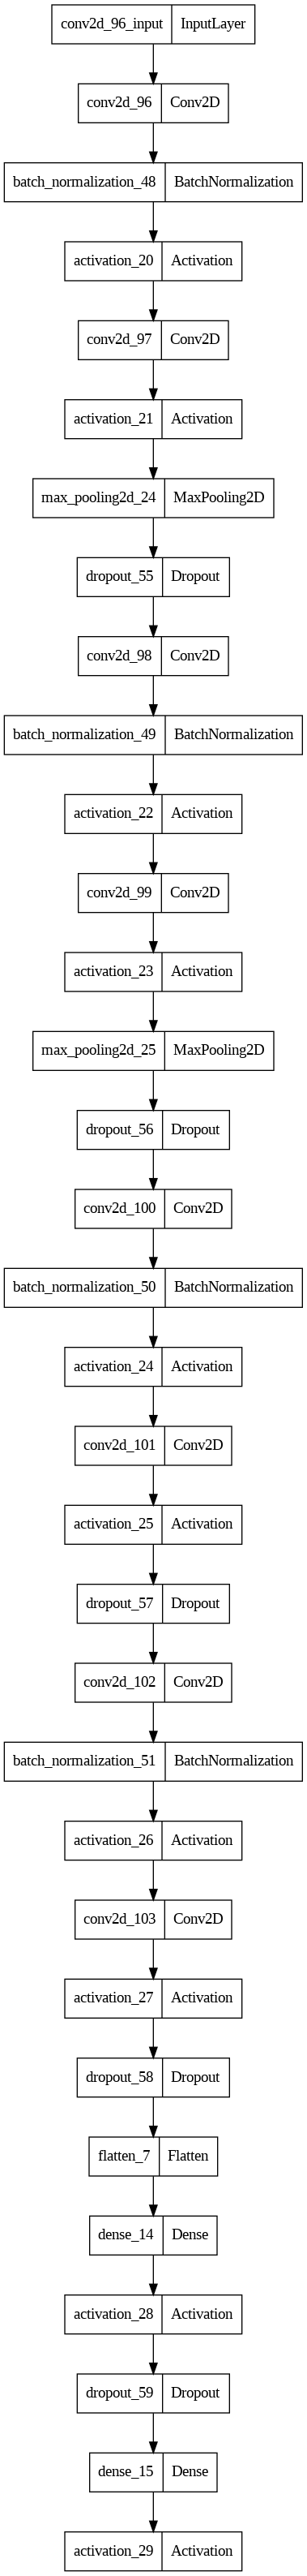

In [17]:
simpleSeq = keras.models.Sequential()
simpleSeq.add(keras.layers.Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:]))
simpleSeq.add(keras.layers.BatchNormalization())
simpleSeq.add(keras.layers.Activation('relu'))
simpleSeq.add(keras.layers.Conv2D(32, (3,3), padding='same'))
simpleSeq.add(keras.layers.Activation('relu'))
simpleSeq.add(keras.layers.MaxPool2D(pool_size=(2,2)))
simpleSeq.add(keras.layers.Dropout(0.1))

simpleSeq.add(keras.layers.Conv2D(64, (3,3), padding='same'))
simpleSeq.add(keras.layers.BatchNormalization())
simpleSeq.add(keras.layers.Activation('relu'))
simpleSeq.add(keras.layers.Conv2D(64, (3,3), padding='same'))
simpleSeq.add(keras.layers.Activation('relu'))
simpleSeq.add(keras.layers.MaxPool2D(pool_size=(2,2)))
simpleSeq.add(keras.layers.Dropout(0.1))

simpleSeq.add(keras.layers.Conv2D(96, (3,3), padding='same'))
simpleSeq.add(keras.layers.BatchNormalization())
simpleSeq.add(keras.layers.Activation('relu'))
simpleSeq.add(keras.layers.Conv2D(96, (3,3), padding='same'))
simpleSeq.add(keras.layers.Activation('relu'))
simpleSeq.add(keras.layers.Dropout(0.1))

simpleSeq.add(keras.layers.Conv2D(128, (3,3), padding='same'))
simpleSeq.add(keras.layers.BatchNormalization())
simpleSeq.add(keras.layers.Activation('relu'))
simpleSeq.add(keras.layers.Conv2D(128, (3,3), padding='same'))
simpleSeq.add(keras.layers.Activation('relu'))
simpleSeq.add(keras.layers.Dropout(0.2))

simpleSeq.add(keras.layers.Flatten())
simpleSeq.add(keras.layers.Dense(1024))
simpleSeq.add(keras.layers.Activation('relu'))
simpleSeq.add(keras.layers.Dropout(0.25))

simpleSeq.add(keras.layers.Dense(10))
simpleSeq.add(keras.layers.Activation('softmax'))

simpleSeq.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
simpleSeq.summary()
plot_model(simpleSeq, to_file='multilayer_perceptron_graph.png')

Epoch 1/15
391/391 [==============================] - 14s 27ms/step - loss: 1.7720 - accuracy: 0.3585 - val_loss: 1.9105 - val_accuracy: 0.3501
Epoch 2/15
391/391 [==============================] - 10s 26ms/step - loss: 1.1641 - accuracy: 0.5807 - val_loss: 1.0328 - val_accuracy: 0.6322
Epoch 3/15
391/391 [==============================] - 10s 26ms/step - loss: 0.9153 - accuracy: 0.6756 - val_loss: 0.8969 - val_accuracy: 0.6885
Epoch 4/15
391/391 [==============================] - 10s 25ms/step - loss: 0.7743 - accuracy: 0.7289 - val_loss: 1.0713 - val_accuracy: 0.6401
Epoch 5/15
391/391 [==============================] - 10s 25ms/step - loss: 0.6882 - accuracy: 0.7596 - val_loss: 0.8112 - val_accuracy: 0.7220
Epoch 6/15
391/391 [==============================] - 10s 25ms/step - loss: 0.6274 - accuracy: 0.7799 - val_loss: 0.7151 - val_accuracy: 0.7561
Epoch 7/15
391/391 [==============================] - 10s 25ms/step - loss: 0.5755 - accuracy: 0.8003 - val_loss: 0.7200 - val_accuracy:

[0.6446629762649536, 0.79339998960495]

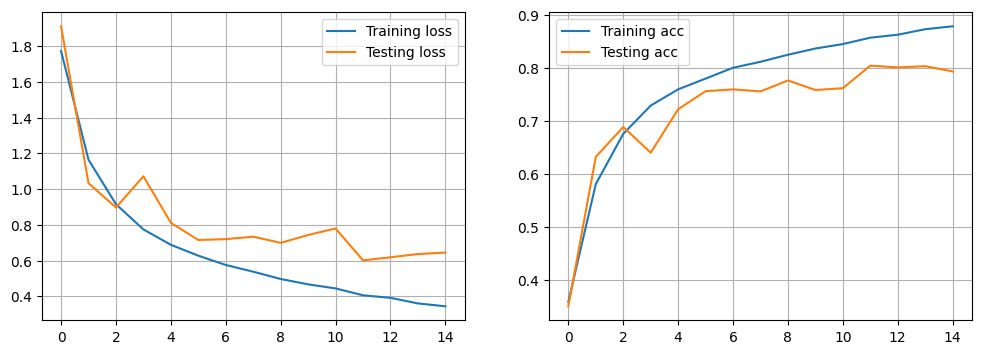

In [18]:
log_simpleSeq = simpleSeq.fit(X_train, Y_train, batch_size=128, epochs=15, verbose=1, validation_data=(X_test, Y_test))
plot_performance(log_simpleSeq)
simpleSeq.evaluate(X_test, Y_test)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_120 (Conv2D)         (None, 32, 32, 32)           896       ['input_7[0][0]']             
                                                                                                  
 conv2d_128 (Conv2D)         (None, 32, 32, 32)           896       ['input_7[0][0]']             
                                                                                                  
 batch_normalization_60 (Ba  (None, 32, 32, 32)           128       ['conv2d_120[0][0]']          
 tchNormalization)                                                                          

Exception ignored in: <function _xla_gc_callback at 0x78699ee0ae60>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


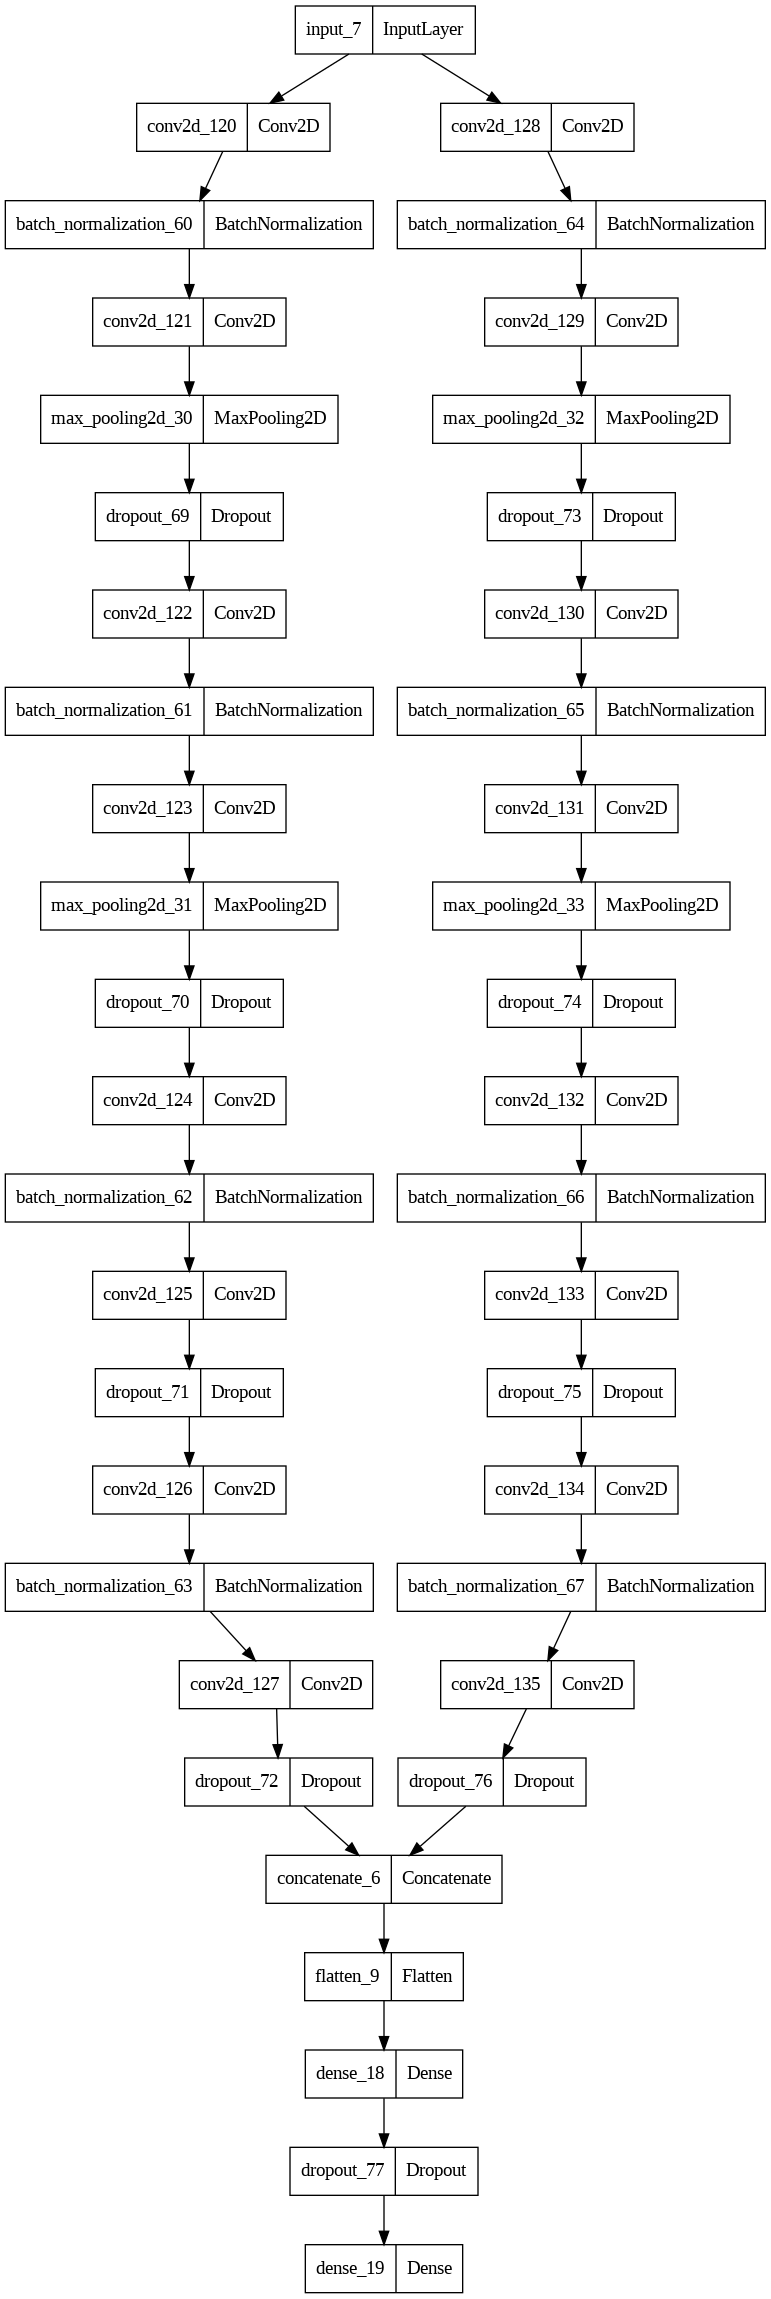

In [21]:
visible = keras.Input(shape=X_train.shape[1:])

# one route
conv1 = keras.layers.Conv2D(32, (3,3), padding='same', activation='relu')(visible)
batch1 = keras.layers.BatchNormalization()(conv1)
conv2 = keras.layers.Conv2D(32, (3,3), padding='same', activation='relu')(batch1)
pool1 = keras.layers.MaxPool2D(pool_size=(2,2))(conv2)
drop1 = keras.layers.Dropout(0.1)(pool1)

conv3 = keras.layers.Conv2D(64, (3,3), padding='same',activation='relu')(drop1)
batch2 = keras.layers.BatchNormalization()(conv3)
conv4 = keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(batch2)
pool2 = keras.layers.MaxPool2D(pool_size=(2,2))(conv4)
drop2 = keras.layers.Dropout(0.1)(pool2)

conv5 = keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(drop2)
batch3 = keras.layers.BatchNormalization()(conv5)
conv6 = keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(batch3)
drop3 = keras.layers.Dropout(0.1)(conv6)

conv7 = keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(drop3)
batch4 = keras.layers.BatchNormalization()(conv7)
conv8 = keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(batch4)
drop4 = keras.layers.Dropout(0.2)(conv8)

# second route
conv21 = keras.layers.Conv2D(32, (3,3), padding='same', activation='relu')(visible)
batch21 = keras.layers.BatchNormalization()(conv21)
conv22 = keras.layers.Conv2D(32, (3,3), padding='same', activation='relu')(batch21)
pool21 = keras.layers.MaxPool2D(pool_size=(2,2))(conv22)
drop21 = keras.layers.Dropout(0.1)(pool21)

conv23 = keras.layers.Conv2D(64, (3,3), padding='same',activation='relu')(drop21)
batch22 = keras.layers.BatchNormalization()(conv23)
conv24 = keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(batch22)
pool22 = keras.layers.MaxPool2D(pool_size=(2,2))(conv24)
drop22 = keras.layers.Dropout(0.1)(pool22)

conv25 = keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(drop22)
batch23 = keras.layers.BatchNormalization()(conv25)
conv26 = keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(batch23)
drop23 = keras.layers.Dropout(0.1)(conv26)

conv27 = keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(drop23)
batch24 = keras.layers.BatchNormalization()(conv27)
conv28 = keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(batch24)
drop24 = keras.layers.Dropout(0.2)(conv28)

# merging of routes
merge = keras.layers.concatenate([drop4, drop24])

flatten = keras.layers.Flatten()(merge)
dense1 = keras.layers.Dense(1024, activation='relu')(flatten)
drop5 = keras.layers.Dropout(0.25)(dense1)

output = keras.layers.Dense(10, activation='softmax')(drop5)

simpleNonSeq = keras.models.Model(inputs=visible, outputs=output)

simpleNonSeq.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
simpleNonSeq.summary()
plot_model(simpleNonSeq, to_file='simpleNonSeq.png')

Epoch 1/15
391/391 [==============================] - 25s 48ms/step - loss: 1.7989 - accuracy: 0.4052 - val_loss: 2.5980 - val_accuracy: 0.1934
Epoch 2/15
391/391 [==============================] - 18s 45ms/step - loss: 1.0451 - accuracy: 0.6316 - val_loss: 0.9236 - val_accuracy: 0.6802
Epoch 3/15
391/391 [==============================] - 17s 44ms/step - loss: 0.8152 - accuracy: 0.7160 - val_loss: 0.8420 - val_accuracy: 0.7120
Epoch 4/15
391/391 [==============================] - 17s 44ms/step - loss: 0.6958 - accuracy: 0.7607 - val_loss: 0.7716 - val_accuracy: 0.7343
Epoch 5/15
391/391 [==============================] - 17s 43ms/step - loss: 0.6228 - accuracy: 0.7848 - val_loss: 0.7856 - val_accuracy: 0.7425
Epoch 6/15
391/391 [==============================] - 17s 44ms/step - loss: 0.5472 - accuracy: 0.8124 - val_loss: 0.6116 - val_accuracy: 0.7928
Epoch 7/15
391/391 [==============================] - 17s 43ms/step - loss: 0.4904 - accuracy: 0.8313 - val_loss: 0.7548 - val_accuracy:

[0.7076160907745361, 0.8115000128746033]

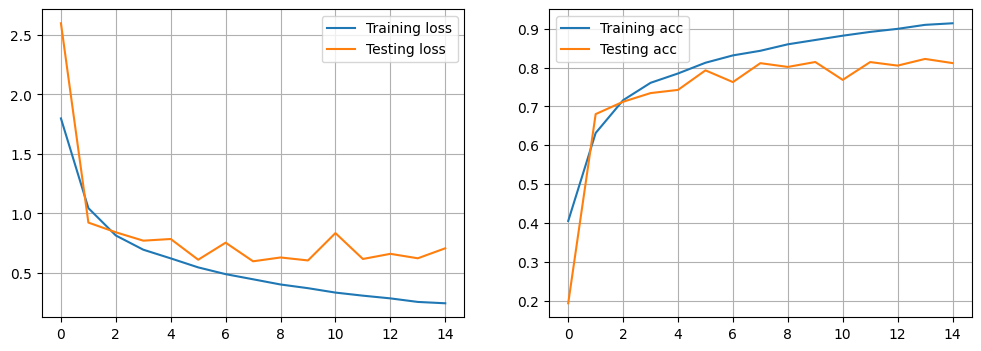

In [20]:
log_simpleNonSeq = simpleNonSeq.fit(X_train, Y_train, batch_size=128, epochs=15, verbose=1, validation_data=(X_test, Y_test))
plot_performance(log_simpleNonSeq)
simpleNonSeq.evaluate(X_test, Y_test)

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_176 (Conv2D)         (None, 32, 32, 32)           896       ['input_12[0][0]']            
                                                                                                  
 batch_normalization_88 (Ba  (None, 32, 32, 32)           128       ['conv2d_176[0][0]']          
 tchNormalization)                                                                                
                                                                                                  
 conv2d_177 (Conv2D)         (None, 32, 32, 32)           9248      ['batch_normalization_88

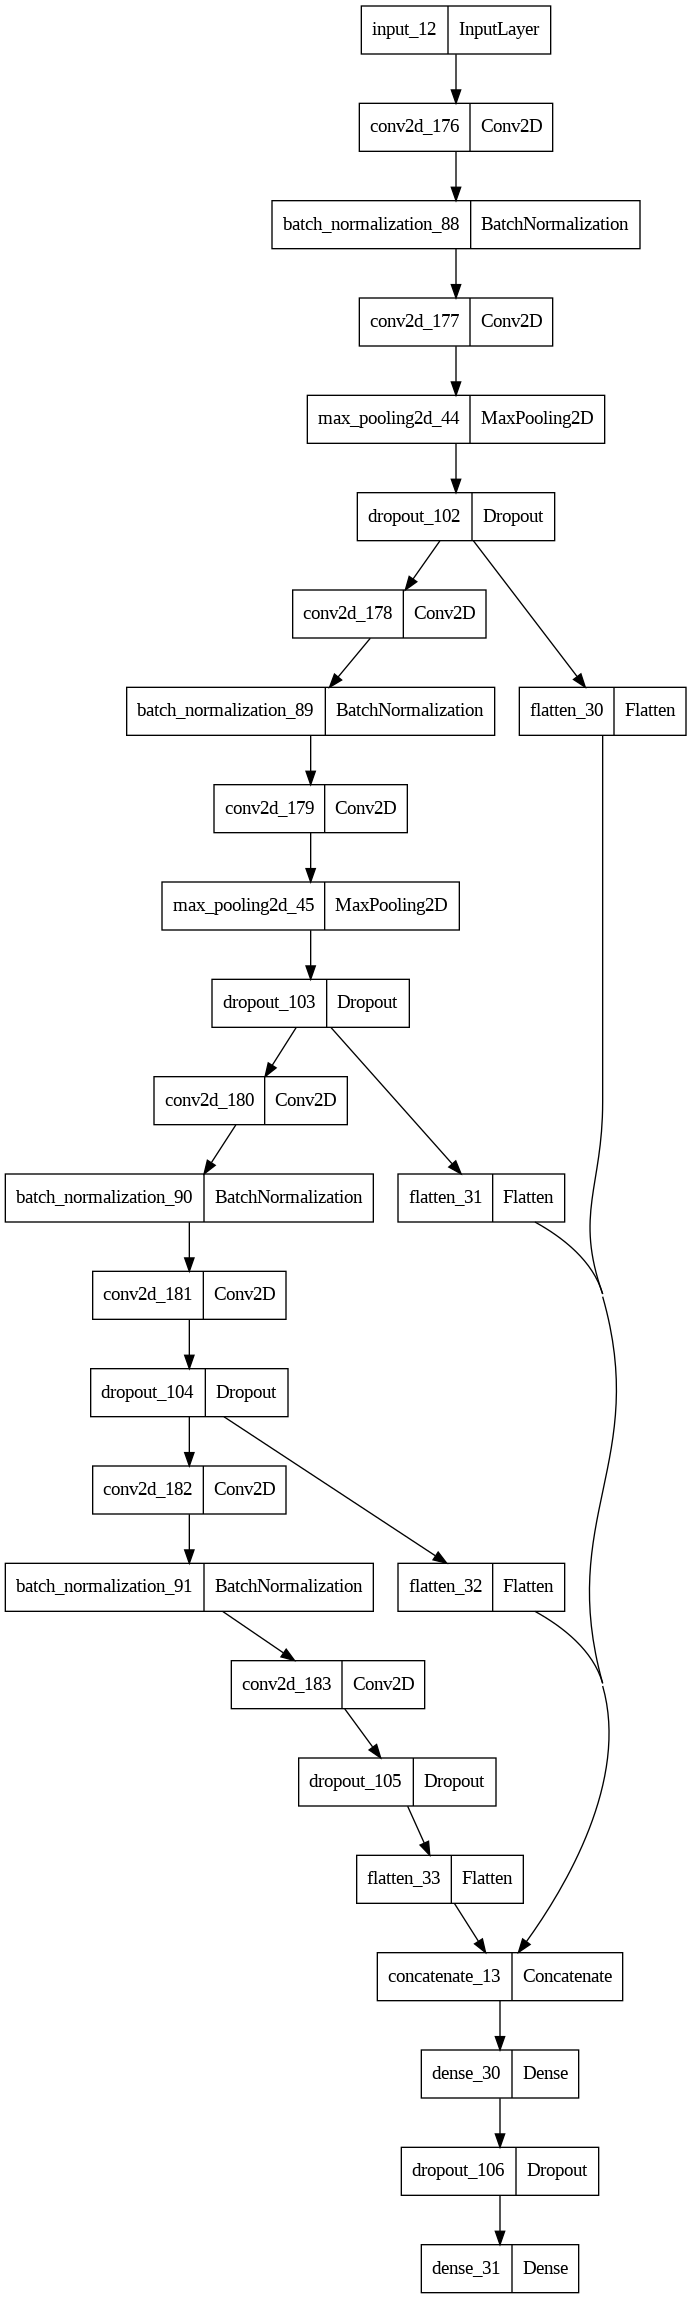

In [32]:
visible = keras.Input(shape=X_train.shape[1:])

conv1 = keras.layers.Conv2D(32, (3,3), padding='same', activation='relu')(visible)
batch1 = keras.layers.BatchNormalization()(conv1)
conv2 = keras.layers.Conv2D(32, (3,3), padding='same', activation='relu')(batch1)
pool1 = keras.layers.MaxPool2D(pool_size=(2,2))(conv2)
drop1 = keras.layers.Dropout(0.1)(pool1)
flatten1 = keras.layers.Flatten()(drop1)

conv3 = keras.layers.Conv2D(64, (3,3), padding='same',activation='relu')(drop1)
batch2 = keras.layers.BatchNormalization()(conv3)
conv4 = keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(batch2)
pool2 = keras.layers.MaxPool2D(pool_size=(2,2))(conv4)
drop2 = keras.layers.Dropout(0.1)(pool2)
flatten2 = keras.layers.Flatten()(drop2)

conv5 = keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(drop2)
batch3 = keras.layers.BatchNormalization()(conv5)
conv6 = keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(batch3)
drop3 = keras.layers.Dropout(0.1)(conv6)
flatten3 = keras.layers.Flatten()(drop3)

conv7 = keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(drop3)
batch4 = keras.layers.BatchNormalization()(conv7)
conv8 = keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(batch4)
drop4 = keras.layers.Dropout(0.2)(conv8)
flatten4 = keras.layers.Flatten()(drop4)

# merging of different features routes like in example
merge = keras.layers.concatenate([flatten1, flatten2, flatten3, flatten4])

dense1 = keras.layers.Dense(1024, activation='relu')(merge)
drop5 = keras.layers.Dropout(0.25)(dense1)

output = keras.layers.Dense(10, activation='softmax')(drop5)

multiFeatureNonSeq = keras.models.Model(inputs=visible, outputs=output)

multiFeatureNonSeq.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
multiFeatureNonSeq.summary()
plot_model(multiFeatureNonSeq, to_file='multiFeatureNonSeq.png')

Epoch 1/15
391/391 [==============================] - 17s 33ms/step - loss: 2.2102 - accuracy: 0.4318 - val_loss: 1.6723 - val_accuracy: 0.3697
Epoch 2/15
391/391 [==============================] - 12s 31ms/step - loss: 1.0792 - accuracy: 0.6190 - val_loss: 1.0027 - val_accuracy: 0.6597
Epoch 3/15
391/391 [==============================] - 12s 31ms/step - loss: 0.8659 - accuracy: 0.6955 - val_loss: 0.9079 - val_accuracy: 0.6921
Epoch 4/15
391/391 [==============================] - 12s 31ms/step - loss: 0.7410 - accuracy: 0.7412 - val_loss: 0.8004 - val_accuracy: 0.7337
Epoch 5/15
391/391 [==============================] - 12s 30ms/step - loss: 0.6476 - accuracy: 0.7759 - val_loss: 0.7470 - val_accuracy: 0.7516
Epoch 6/15
391/391 [==============================] - 12s 30ms/step - loss: 0.5719 - accuracy: 0.8008 - val_loss: 0.8076 - val_accuracy: 0.7471
Epoch 7/15
391/391 [==============================] - 12s 31ms/step - loss: 0.5085 - accuracy: 0.8239 - val_loss: 0.6718 - val_accuracy:

[0.7635750770568848, 0.8019000291824341]

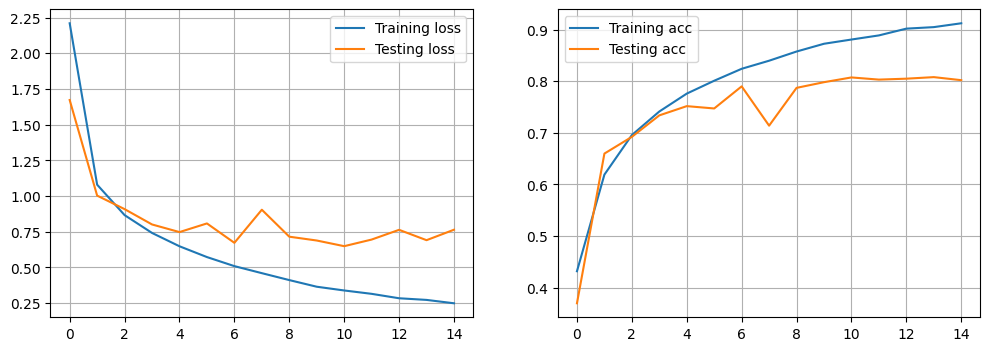

In [25]:
log_multiFeatureNonSeq = multiFeatureNonSeq.fit(X_train, Y_train, batch_size=128, epochs=15, verbose=1, validation_data=(X_test, Y_test))
plot_performance(log_multiFeatureNonSeq)
multiFeatureNonSeq.evaluate(X_test, Y_test)

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_21 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_228 (Conv2D)         (None, 32, 32, 32)           896       ['input_21[0][0]']            
                                                                                                  
 conv2d_236 (Conv2D)         (None, 32, 32, 32)           896       ['input_21[0][0]']            
                                                                                                  
 batch_normalization_100 (B  (None, 32, 32, 32)           128       ['conv2d_228[0][0]']          
 atchNormalization)                                                                        

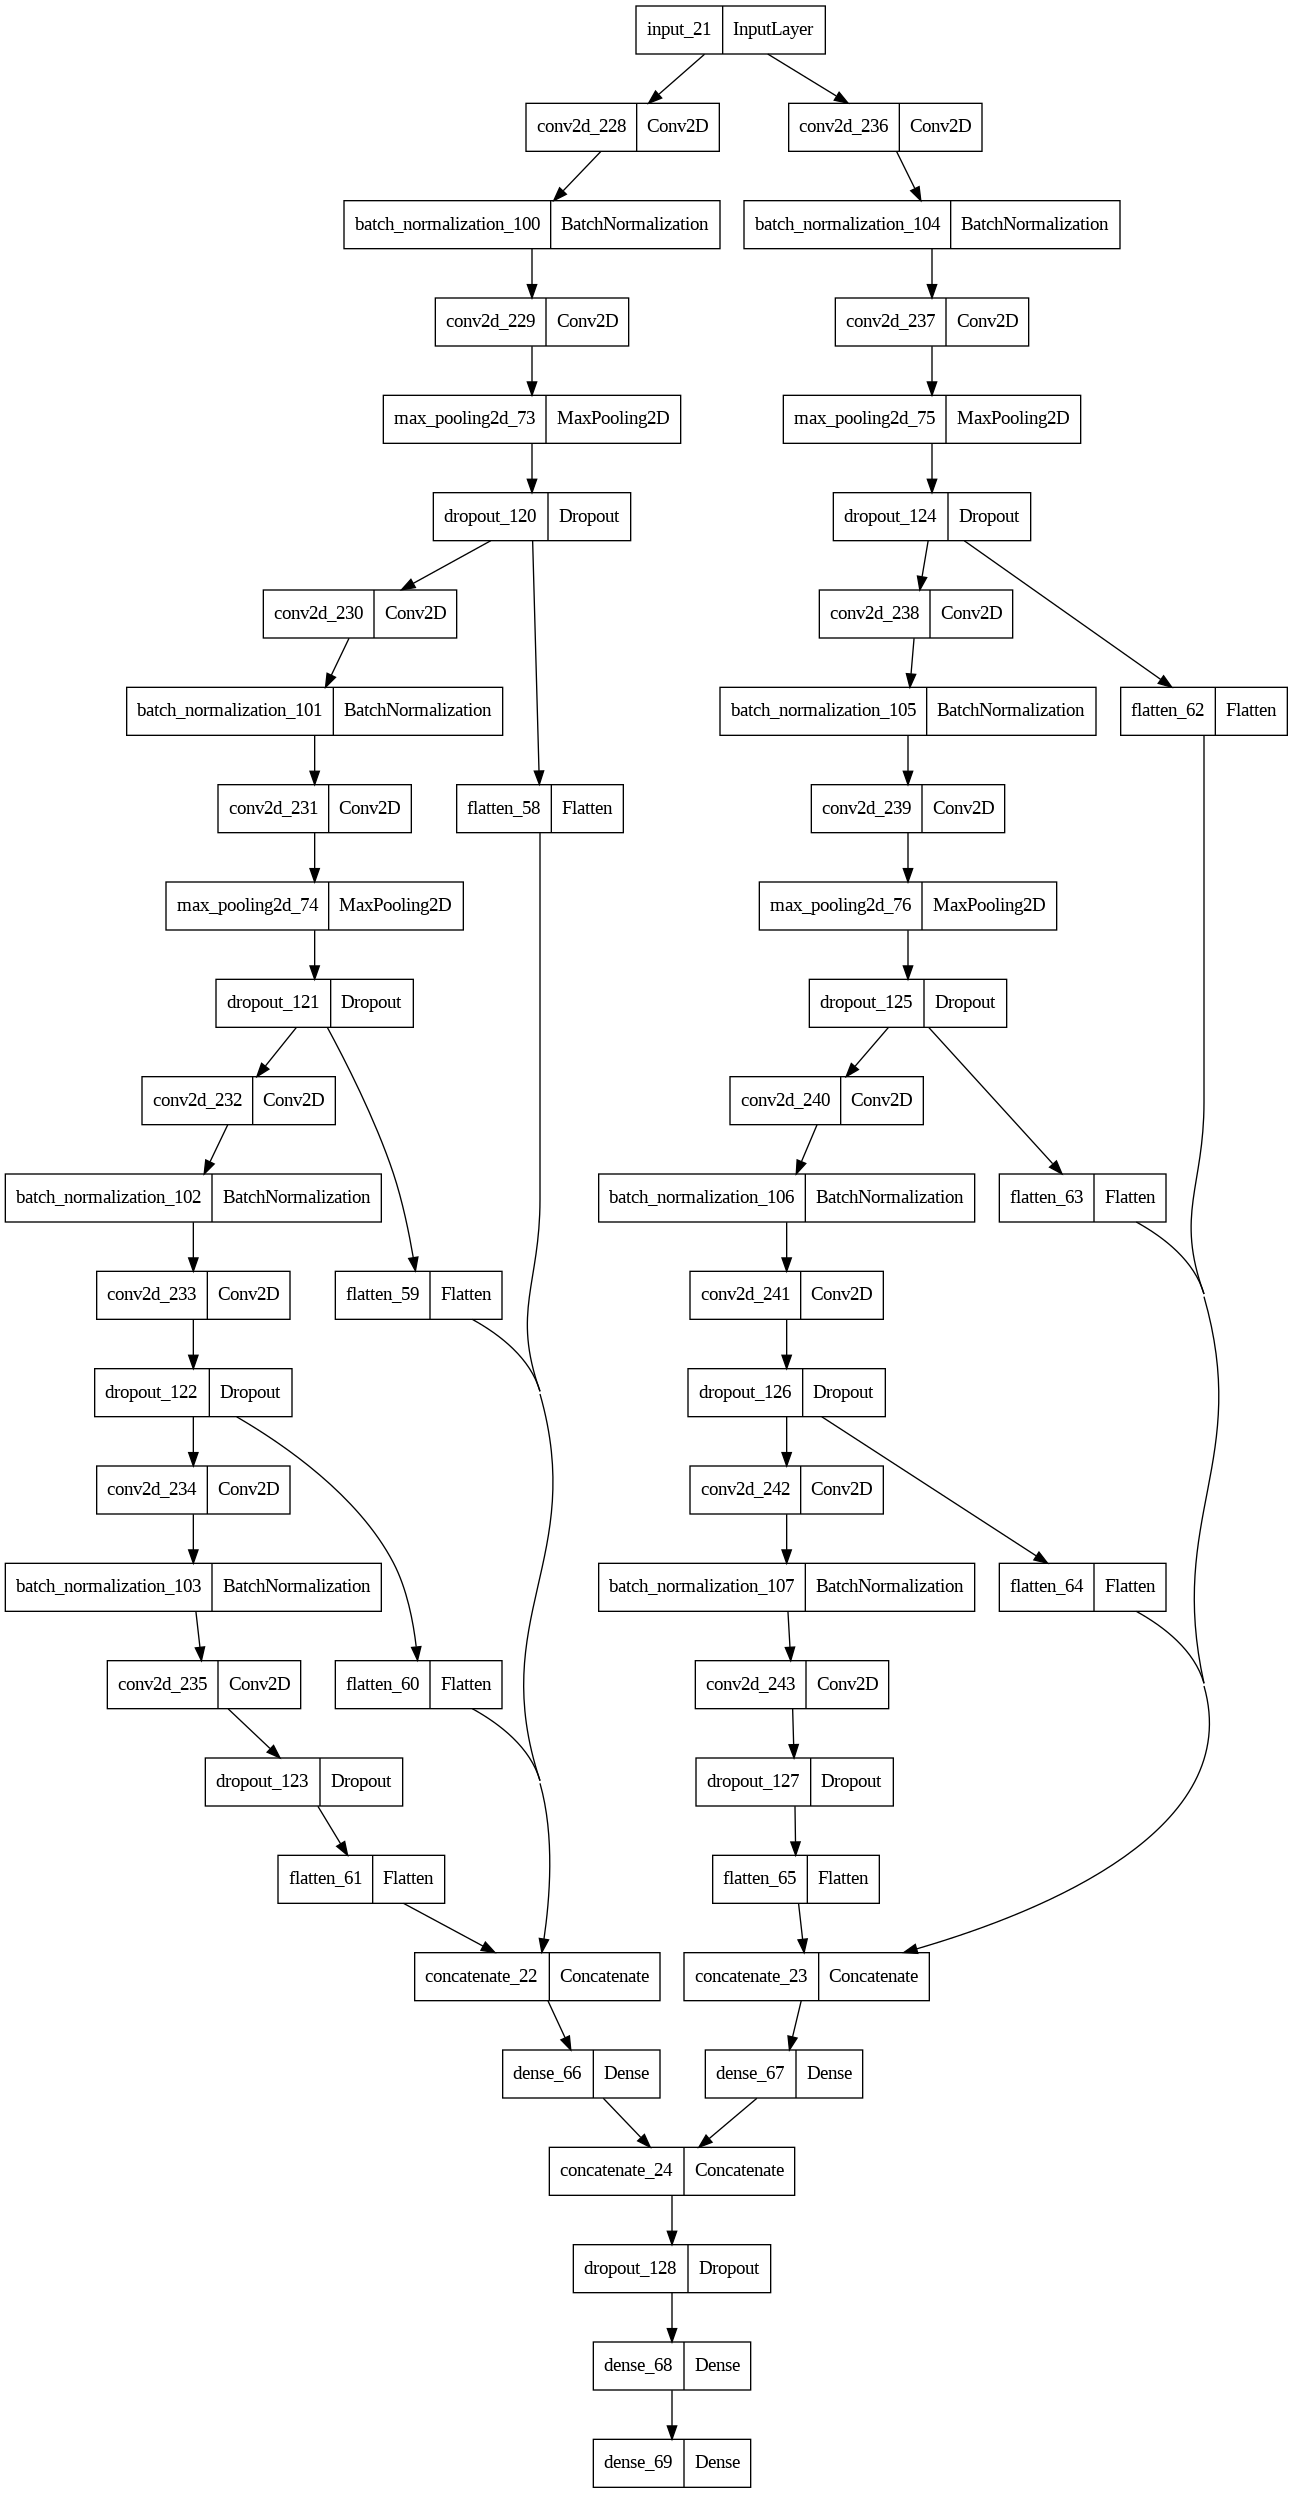

In [45]:
visible = keras.Input(shape=X_train.shape[1:])

# one route with feature extraction & propagating
conv1 = keras.layers.Conv2D(32, (3,3), padding='same', activation='relu')(visible)
batch1 = keras.layers.BatchNormalization()(conv1)
conv2 = keras.layers.Conv2D(32, (3,3), padding='same', activation='relu')(batch1)
pool1 = keras.layers.MaxPool2D(pool_size=(2,2))(conv2)
drop1 = keras.layers.Dropout(0.1)(pool1)
flatten1 = keras.layers.Flatten()(drop1)

conv3 = keras.layers.Conv2D(64, (3,3), padding='same',activation='relu')(drop1)
batch2 = keras.layers.BatchNormalization()(conv3)
conv4 = keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(batch2)
pool2 = keras.layers.MaxPool2D(pool_size=(2,2))(conv4)
drop2 = keras.layers.Dropout(0.1)(pool2)
flatten2 = keras.layers.Flatten()(drop2)

conv5 = keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(drop2)
batch3 = keras.layers.BatchNormalization()(conv5)
conv6 = keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(batch3)
drop3 = keras.layers.Dropout(0.1)(conv6)
flatten3 = keras.layers.Flatten()(drop3)

conv7 = keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(drop3)
batch4 = keras.layers.BatchNormalization()(conv7)
conv8 = keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(batch4)
drop4 = keras.layers.Dropout(0.2)(conv8)
flatten4 = keras.layers.Flatten()(drop4)

merge1 = keras.layers.concatenate([flatten1, flatten2, flatten3, flatten4])
dense1 = keras.layers.Dense(1024, activation='relu')(merge1)

# second route with feature extraction & propagating
conv21 = keras.layers.Conv2D(32, (3,3), padding='same', activation='relu')(visible)
batch21 = keras.layers.BatchNormalization()(conv21)
conv22 = keras.layers.Conv2D(32, (3,3), padding='same', activation='relu')(batch21)
pool21 = keras.layers.MaxPool2D(pool_size=(2,2))(conv22)
drop21 = keras.layers.Dropout(0.1)(pool21)
flatten21 = keras.layers.Flatten()(drop21)

conv23 = keras.layers.Conv2D(64, (3,3), padding='same',activation='relu')(drop21)
batch22 = keras.layers.BatchNormalization()(conv23)
conv24 = keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(batch22)
pool22 = keras.layers.MaxPool2D(pool_size=(2,2))(conv24)
drop22 = keras.layers.Dropout(0.1)(pool22)
flatten22 = keras.layers.Flatten()(drop22)

conv25 = keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(drop22)
batch23 = keras.layers.BatchNormalization()(conv25)
conv26 = keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(batch23)
drop23 = keras.layers.Dropout(0.1)(conv26)
flatten23 = keras.layers.Flatten()(drop23)

conv27 = keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(drop23)
batch24 = keras.layers.BatchNormalization()(conv27)
conv28 = keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(batch24)
drop24 = keras.layers.Dropout(0.2)(conv28)
flatten24 = keras.layers.Flatten()(drop24)

merge2 = keras.layers.concatenate([flatten21, flatten22, flatten23, flatten24])
dense2 = keras.layers.Dense(1024, activation='relu')(merge2)

# merging of different features routes like in example
merge3 = keras.layers.concatenate([dense1, dense2])

drop5 = keras.layers.Dropout(0.25)(merge3)

dense3 = keras.layers.Dense(512)(drop5)

output = keras.layers.Dense(10, activation='softmax')(dense3)

multiRouteMultiFeatureNonSeq = keras.models.Model(inputs=visible, outputs=output)

optimizer = keras.optimizers.Adam(learning_rate=0.0001)

multiRouteMultiFeatureNonSeq.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
multiRouteMultiFeatureNonSeq.summary()
plot_model(multiRouteMultiFeatureNonSeq, to_file='multiRouteMultiFeatureNonSeq.png')

In [44]:
log_multiRouteMultiFeatureNonSeq = multiRouteMultiFeatureNonSeq.fit(X_train, Y_train, batch_size=128, epochs=15, verbose=1, validation_data=(X_test, Y_test))
plot_performance(log_multiRouteMultiFeatureNonSeq)
multiRouteMultiFeatureNonSeq.evaluate(X_test, Y_test)

Epoch 1/15
216/391 [===============>..............] - ETA: 10s - loss: 2.0422 - accuracy: 0.3824

KeyboardInterrupt: 

Epoch 1/100
390/391 [============================>.] - ETA: 0s - loss: 1.6983 - accuracy: 0.4433
Epoch 1: val_accuracy improved from -inf to 0.27760, saving model to multiRouteMultiFeatureNonSeq-001.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


391/391 [==============================] - 56s 125ms/step - loss: 1.6977 - accuracy: 0.4435 - val_loss: 2.5718 - val_accuracy: 0.2776
Epoch 2/100
390/391 [============================>.] - ETA: 0s - loss: 1.1305 - accuracy: 0.5913
Epoch 2: val_accuracy improved from 0.27760 to 0.61350, saving model to multiRouteMultiFeatureNonSeq-002.h5
391/391 [==============================] - 49s 126ms/step - loss: 1.1309 - accuracy: 0.5912 - val_loss: 1.0928 - val_accuracy: 0.6135
Epoch 3/100
390/391 [============================>.] - ETA: 0s - loss: 0.9443 - accuracy: 0.6616
Epoch 3: val_accuracy improved from 0.61350 to 0.61430, saving model to multiRouteMultiFeatureNonSeq-003.h5
391/391 [==============================] - 35s 90ms/step - loss: 0.9443 - accuracy: 0.6616 - val_loss: 1.1008 - val_accuracy: 0.6143
Epoch 4/100
390/391 [============================>.] - ETA: 0s - loss: 0.8288 - accuracy: 0.7048
Epoch 4: val_accuracy improved from 0.61430 to 0.68780, saving model to multiRouteMultiFeatu

[1.3098665475845337, 0.8130999803543091]

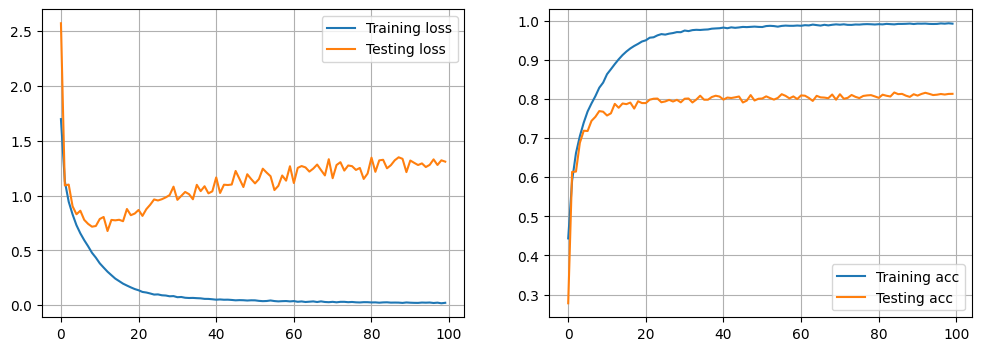

In [46]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('multiRouteMultiFeatureNonSeq-{epoch:03d}.h5', verbose=1,
                             monitor='val_accuracy',save_best_only=True,
                             mode='auto')
log_bestmodel = multiRouteMultiFeatureNonSeq.fit(X_train, Y_train, batch_size=128, epochs=100,
                 verbose=1, validation_data=(X_test, Y_test),
                 callbacks=[checkpoint])
plot_performance(log_bestmodel)
multiRouteMultiFeatureNonSeq.evaluate(X_test, Y_test)

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_208 (Conv2D)         (None, 32, 32, 32)           4736      ['input_19[0][0]']            
                                                                                                  
 max_pooling2d_66 (MaxPooli  (None, 10, 10, 32)           0         ['conv2d_208[0][0]']          
 ng2D)                                                                                            
                                                                                                  
 dense_57 (Dense)            (None, 10, 10, 256)          8448      ['max_pooling2d_66[0][0

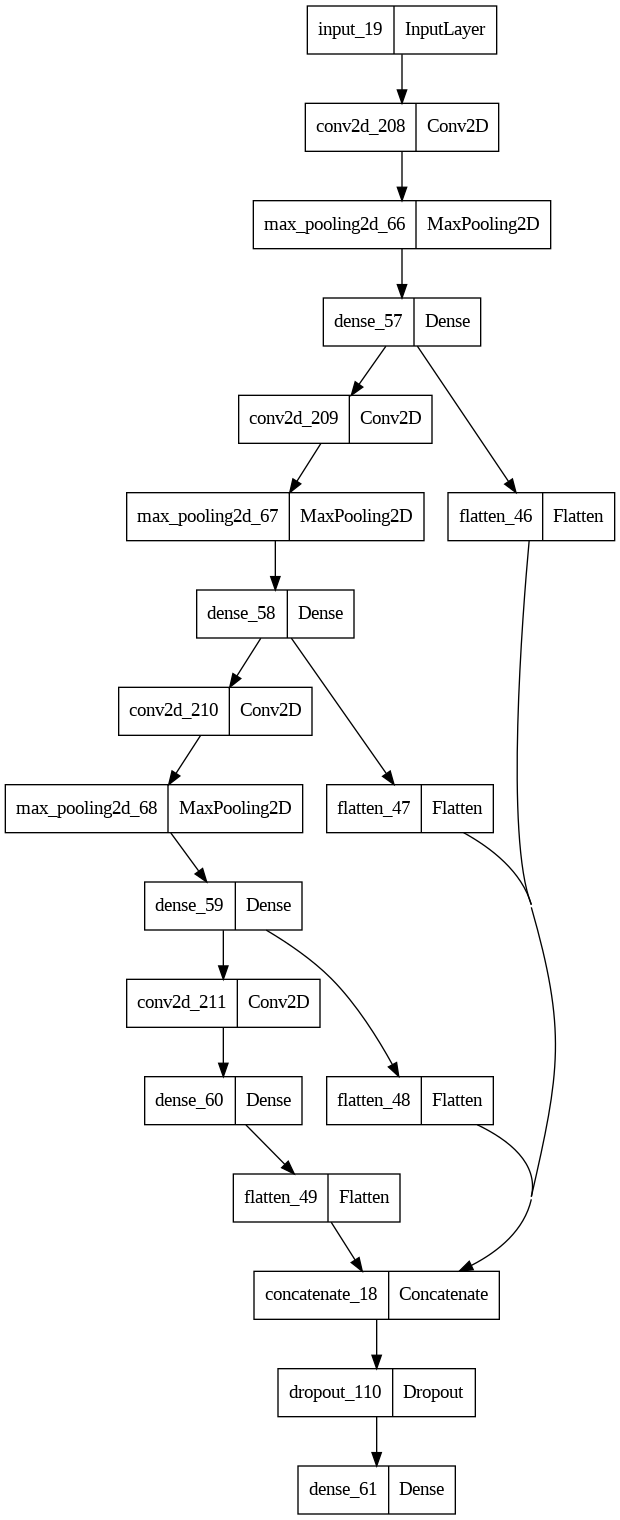

In [42]:
visible = keras.Input(shape=X_train.shape[1:])

conv1 = keras.layers.Conv2D(32, (7,7), padding='same', activation='relu')(visible)
pool1 = keras.layers.MaxPool2D(pool_size=(3,3))(conv1)
dense1 = keras.layers.Dense(256)(pool1)
flatten1 = keras.layers.Flatten()(dense1)

conv2 = keras.layers.Conv2D(32, (5,5), padding='same', activation='relu')(dense1)
pool2 = keras.layers.MaxPool2D(pool_size=(3,3))(conv2)
dense2 = keras.layers.Dense(256)(pool2)
flatten2 = keras.layers.Flatten()(dense2)

conv3 = keras.layers.Conv2D(32, (2,2), padding='same', activation='relu')(dense2)
pool3 = keras.layers.MaxPool2D(pool_size=(3,3))(conv3)
dense3 = keras.layers.Dense(256)(pool3)
flatten3 = keras.layers.Flatten()(dense3)

conv4 = keras.layers.Conv2D(32, (2,2), padding='same', activation='relu')(dense3)
dense4 = keras.layers.Dense(256)(conv4)
flatten4 = keras.layers.Flatten()(dense4)

merge = keras.layers.concatenate([flatten1, flatten2, flatten3, flatten4])
drop5 = keras.layers.Dropout(0.2)(merge)

output = keras.layers.Dense(10, activation='softmax')(drop5)

convDenseConv = keras.models.Model(inputs=visible, outputs=output)

optimizer = keras.optimizers.Adam(learning_rate=0.0001)

convDenseConv.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
convDenseConv.summary()
plot_model(convDenseConv, to_file='convDenseConv.png')

Epoch 1/50
389/391 [============================>.] - ETA: 0s - loss: 1.7510 - accuracy: 0.3774
Epoch 1: val_accuracy did not improve from 0.70250
391/391 [==============================] - 9s 17ms/step - loss: 1.7501 - accuracy: 0.3777 - val_loss: 1.4990 - val_accuracy: 0.4618
Epoch 2/50
387/391 [============================>.] - ETA: 0s - loss: 1.4402 - accuracy: 0.4866
Epoch 2: val_accuracy did not improve from 0.70250
391/391 [==============================] - 5s 13ms/step - loss: 1.4402 - accuracy: 0.4866 - val_loss: 1.3770 - val_accuracy: 0.5058
Epoch 3/50
389/391 [============================>.] - ETA: 0s - loss: 1.3397 - accuracy: 0.5261
Epoch 3: val_accuracy did not improve from 0.70250
391/391 [==============================] - 5s 14ms/step - loss: 1.3394 - accuracy: 0.5263 - val_loss: 1.3008 - val_accuracy: 0.5380
Epoch 4/50
389/391 [============================>.] - ETA: 0s - loss: 1.2641 - accuracy: 0.5556
Epoch 4: val_accuracy did not improve from 0.70250
391/391 [=======

[0.9875741004943848, 0.6807000041007996]

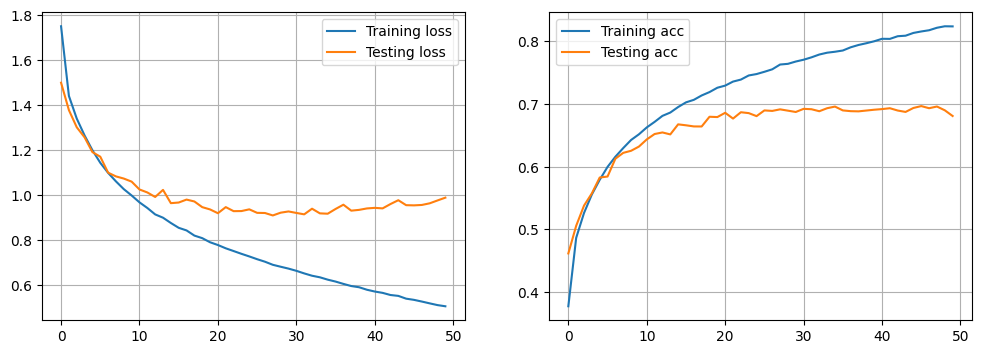

In [41]:
checkpoint2 = ModelCheckpoint('convDenseConv-{epoch:03d}.h5', verbose=1,
                             monitor='val_accuracy',save_best_only=True,
                             mode='auto')
log_bestmodel2 = convDenseConv.fit(X_train, Y_train, batch_size=128, epochs=50,
                 verbose=1, validation_data=(X_test, Y_test),
                 callbacks=[checkpoint])
plot_performance(log_bestmodel2)
convDenseConv.evaluate(X_test, Y_test)

| Model | Architecture                                                                 | Callback | Acc. loss | Acc. test % |
|-------|------------------------------------------------------------------------------|----------|-----------|-------------|
| 1     | Conv2D(32, (3,3), padding='same') -> BatchNormalization() -> Activation('relu') -> Conv2D(32, (3,3), padding='same') -> Activation('relu') -> MaxPool2D((2,2)) -> Dropout(0.1) -> Conv2D(64, (3,3), padding='same') -> BatchNormalization() -> Activation('relu') -> Conv2D(64, (3,3), padding='same') -> Activation('relu') -> MaxPool2D((2,2)) -> Dropout(0.1) -> Conv2D(96, (3,3), padding='same') -> BatchNormalization() -> Activation('relu') -> Conv2D(96, (3,3), padding='same') -> Activation('relu') -> Dropout(0.1) -> Conv2D(128, (3,3), padding='same') -> BatchNormalization() -> Activation('relu') -> Conv2D(128, (3,3), padding='same') -> Activation('relu') -> Dropout(0.2) -> Flatten() -> Dense(1024) -> Activation('relu') -> Dropout(0.25) -> Dense(10) -> Activation('softmax') | no       | 0.64      | 79.34%      |
| 2     | Input(shape) -> Conv2D(32, (3,3), padding='same', activation='relu') -> BatchNormalization() -> Conv2D(32, (3,3), padding='same', activation='relu') -> MaxPool2D((2,2)) -> Dropout(0.1) -> Conv2D(64, (3,3), padding='same', activation='relu') -> BatchNormalization() -> Conv2D(64, (3,3), padding='same', activation='relu') -> MaxPool2D((2,2)) -> Dropout(0.1) -> Conv2D(96, (3,3), padding='same', activation='relu') -> BatchNormalization() -> Conv2D(96, (3,3), padding='same', activation='relu') -> Dropout(0.1) -> Conv2D(96, (3,3), padding='same', activation='relu') -> BatchNormalization() -> Conv2D(96, (3,3), padding='same', activation='relu') -> Dropout(0.2) -> [Merged with second route] -> Flatten() -> Dense(1024, activation='relu') -> Dropout(0.25) -> Dense(10, activation='softmax') | no       | 0.71      | 81.15%      |
| 3     | Input(shape) -> Conv2D(32, (3,3), padding='same', activation='relu') -> BatchNormalization() -> Conv2D(32, (3,3), padding='same', activation='relu') -> MaxPool2D((2,2)) -> Dropout(0.1) -> Flatten() -> Conv2D(64, (3,3), padding='same', activation='relu') -> BatchNormalization() -> Conv2D(64, (3,3), padding='same', activation='relu') -> MaxPool2D((2,2)) -> Dropout(0.1) -> Flatten() -> Conv2D(96, (3,3), padding='same', activation='relu') -> BatchNormalization() -> Conv2D(96, (3,3), padding='same', activation='relu') -> Dropout(0.1) -> Flatten() -> Conv2D(96, (3,3), padding='same', activation='relu') -> BatchNormalization() -> Conv2D(96, (3,3), padding='same', activation='relu') -> Dropout(0.2) -> Flatten() -> [Merged features] -> Dense(1024, activation='relu') -> Dropout(0.25) -> Dense(10, activation='softmax') | no       | 0.76      | 80.19%      |
| 4     | Input(shape) -> Conv2D(32, (3,3), padding='same', activation='relu') -> BatchNormalization() -> Conv2D(32, (3,3), padding='same', activation='relu') -> MaxPool2D((2,2)) -> Dropout(0.1) -> Flatten() -> Conv2D(64, (3,3), padding='same', activation='relu') -> BatchNormalization() -> Conv2D(64, (3,3), padding='same', activation='relu') -> MaxPool2D((2,2)) -> Dropout(0.1) -> Flatten() -> Conv2D(96, (3,3), padding='same', activation='relu') -> BatchNormalization() -> Conv2D(96, (3,3), padding='same', activation='relu') -> Dropout(0.1) -> Flatten() -> Conv2D(96, (3,3), padding='same', activation='relu') -> BatchNormalization() -> Conv2D(96, (3,3), padding='same', activation='relu') -> Dropout(0.2) -> Flatten() -> [Merged features] -> Dense(1024, activation='relu') -> Dropout(0.25) -> Dense(10, activation='softmax') | yes      | 1.31      | 81.3%       |
| 5     | Input(shape) -> Conv2D(32, (7,7), padding='same', activation='relu') -> MaxPool2D((3,3)) -> Dense(256) -> Flatten() -> Conv2D(32, (5,5), padding='same', activation='relu') -> MaxPool2D((3,3)) -> Dense(256) -> Flatten() -> Conv2D(32, (2,2), padding='same', activation='relu') -> MaxPool2D((3,3)) -> Dense(256) -> Flatten() -> Conv2D(32, (2,2), padding='same', activation='relu') -> Dense(256) -> Flatten() -> [Merged features] -> Dropout(0.2) -> Dense(10, activation='softmax') | yes      | 0.99      | 68.07%      |



## Results

### Key Findings

1. Simple vs. Complex Models:
        Our models are relatively simple compared to the more complex models used in CIFAR-10 benchmarks. Despite this, Model 2 achieved an accuracy of 81.15%, which is decent for a simpler model.

2. Sequential Models:
        Models 1 and 2, which are sequential, performed well. Model 2, in particular, had the highest accuracy among our models at 81.15%.

4. Non-Sequential Models:
        Non-sequential models (Models 3 and 4) showed slightly better performance but also had higher accuracy loss, which might mean they are more prone to overfitting.

5. Regularization Techniques:
        Using BatchNormalization and Dropout layers helped improve the performance by preventing overfitting. Model 4, which used these techniques effectively, had the highest accuracy (81.3%) but also the highest accuracy loss (1.31).

6. Layer Configuration:
        Models with deeper and more complex configurations generally performed better. For instance, Model 1 and Model 2, with more convolutional layers, achieved higher accuracy than Model 5, which had a less conventional setup and achieved lower accuracy (68.07%).

### Conclusion

Although our models are simpler compared to the more complex models used in CIFAR-10 benchmarks, achieving around 81% accuracy is quite good. This shows that even with simpler architectures, we can still obtain competitive results. More advanced and complex models might achieve higher accuracy, but for our simpler models, an accuracy of around 81% is a satisfactory result. Future work could explore more sophisticated architectures and techniques to push the accuracy even higher.